In [ ]:
# Importing the zipfile to extract the data
import zipfile

# Unzip the data
zep_ref = zipfile.ZipFile("/content/drive/MyDrive/Data Set/processed_data.zip")
zep_ref.extractall()
zep_ref.close()

In [ ]:
# Inspect the data
import os

# Walk through the directory
for dirpath, dirnames, filenames in os.walk("processed_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'processed_data'.
There are 4 directories and 0 images in 'processed_data/train'.
There are 0 directories and 508 images in 'processed_data/train/Curcuma casia'.
There are 0 directories and 480 images in 'processed_data/train/Curcuma zeodaria'.
There are 0 directories and 543 images in 'processed_data/train/Curcuma longa'.
There are 0 directories and 484 images in 'processed_data/train/Curcuma amada'.
There are 4 directories and 0 images in 'processed_data/val'.
There are 0 directories and 127 images in 'processed_data/val/Curcuma casia'.
There are 0 directories and 120 images in 'processed_data/val/Curcuma zeodaria'.
There are 0 directories and 136 images in 'processed_data/val/Curcuma longa'.
There are 0 directories and 121 images in 'processed_data/val/Curcuma amada'.


In [ ]:
# Get the class_names programmatically
import numpy as np
import pathlib

data_dir = pathlib.Path("processed_data/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['Curcuma amada' 'Curcuma casia' 'Curcuma longa' 'Curcuma zeodaria']


In [ ]:
# Define directory dataset paths
train_dir = "processed_data/train"
test_dir = "processed_data/val"

In [ ]:
# Setup data inputs
import tensorflow as tf
IMG_SIZE = (224, 224)
BATCH_SIZE = 1

train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                  label_mode = 'categorical',
                                                                  image_size = IMG_SIZE,
                                                                  batch_size = BATCH_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode = 'categorical',
                                                                image_size = IMG_SIZE,
                                                                batch_size = BATCH_SIZE)

Found 2015 files belonging to 4 classes.
Found 504 files belonging to 4 classes.


In [ ]:
# Importing tensorflow library to create data augmentation layer
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Create data augmentation stage with horizontal flipping, rotation, zoom etc
data_augmentation = keras.Sequential([
      preprocessing.RandomFlip("horizontal"),
      preprocessing.RandomRotation(0.2),
      preprocessing.RandomZoom(0.2),
      preprocessing.RandomHeight(0.2),
      preprocessing.RandomWidth(0.2),
      #preprocessing.Rescale(1/255.)
])

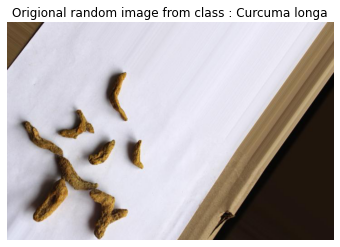

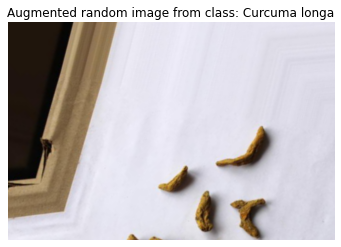

In [ ]:
# View a random images and compare it to its augmented version
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

target_class = random.choice(train_data.class_names)
target_dir = "processed_data/train/" + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" + random_image

# Read and plot in the random image
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"Origional random image from class : {target_class}")
plt.axis(False);

# Now let's plot our augmented random image
augmented_img = data_augmentation(tf.expand_dims(img, axis=0))
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.)
plt.title(f"Augmented random image from class: {target_class}")
plt.axis(False);

In [ ]:
# Setup the shape and base model, freezing the base model layers
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

# Create input layer
inputs = layers.Input(shape=input_shape, name="input_layer")

# Add in the data augmentation on Sequential model as  a layer
x = data_augmentation(inputs)

# Give base model the inputs (after augmentation) and don't train it
x = base_model(x, training=False)

# Pool output features of the base model
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

# Put the dense layer on as the model
outputs = layers.Dense(4, activation='softmax', name="output_layer")(x)

# Make a model using the inputs and outputs
model = keras.Model(inputs, outputs)

16719872/16705208 [==============================] - 0s 0us/step


In [ ]:
# Get a summary of model we'he created
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, None, None, 3)     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling_layer (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 4)                 5124      
Total params: 4,054,695
Trainable params: 5,124
Non-trainable params: 4,049,571
_________________________________________________________________


In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
# Creating a Early Stoppage Callback
early_stoppage = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)

In [ ]:
# Fit the model
history = model.fit(train_data,
                    epochs=10,
                    steps_per_epoch = len(train_data),
                    validation_data = test_data,
                    validation_steps = len(test_data))

Epoch 1/10
2015/2015 [==============================] - 104s 52ms/step - loss: 0.0326 - accuracy: 0.9896 - val_loss: 0.0432 - val_accuracy: 0.9881
Epoch 2/10
2015/2015 [==============================] - 104s 52ms/step - loss: 0.0343 - accuracy: 0.9891 - val_loss: 0.0644 - val_accuracy: 0.9663
Epoch 3/10
2015/2015 [==============================] - 104s 52ms/step - loss: 0.0278 - accuracy: 0.9906 - val_loss: 0.0352 - val_accuracy: 0.9861
Epoch 4/10
2015/2015 [==============================] - 102s 51ms/step - loss: 0.0230 - accuracy: 0.9935 - val_loss: 0.0547 - val_accuracy: 0.9821
Epoch 5/10
2015/2015 [==============================] - 106s 52ms/step - loss: 0.0291 - accuracy: 0.9911 - val_loss: 0.1056 - val_accuracy: 0.9603
Epoch 6/10
2015/2015 [==============================] - 101s 50ms/step - loss: 0.0235 - accuracy: 0.9926 - val_loss: 0.0804 - val_accuracy: 0.9663
Epoch 7/10
2015/2015 [==============================] - 102s 51ms/step - loss: 0.0299 - accuracy: 0.9891 - val_loss: 0

In [ ]:
test_loss,test_acc = model.evaluate(test_data,verbose=1)
print("\n\ntest accuarcy: ",test_acc)

504/504 [==============================] - 21s 42ms/step - loss: 0.0312 - accuracy: 0.9881


test accuarcy:  0.988095223903656


In [ ]:
# Let's create a function to plot our loss curves...
import matplotlib.pyplot as plt

# Plot the validation and training curves
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label="training_loss", c='r', marker='o', linestyle='dashed')
  plt.plot(epochs, val_loss, label='val_loss',  c='b', marker='*', linestyle='dashed')
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy",c='g', marker='o', linestyle='dashed')
  plt.plot(epochs, val_accuracy, label='val_accuracy', c='r', marker='*', linestyle='dashed')
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()

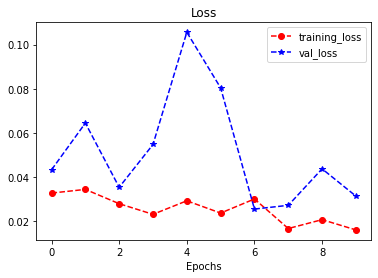

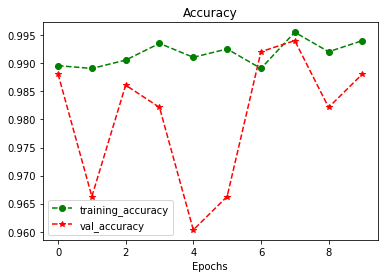

In [ ]:
# Check out our model's training curves
plot_loss_curves(history)

In [ ]:
def get_file_size(file_path):
  size = os.path.getsize(file_path)
  return size

In [ ]:
def convert_bytes(size, unit=None):
    if unit == "KB":
        return print('File size: ' + str(round(size / 1024, 3)) + ' Kilobytes')
    elif unit == "MB":
        return print('File size: ' + str(round(size / (1024 * 1024), 3)) + ' Megabytes')
    else:
        return print('File size: ' + str(size) + ' bytes')

In [ ]:
#Define a variable to store our model
MODEL_NAME = "eficientnetb0_curcuma.h5"

In [ ]:
# Saving the model
model.save(MODEL_NAME)

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
convert_bytes(get_file_size(MODEL_NAME), "MB")

File size: 15.886 Megabytes
File size: 15.886 Megabytes


### **TF LITE MODEL**

In [ ]:
TF_LITE_MODEL_FILE_NAME = "tf_lite_model_curcuma.tflite"

In [ ]:
# Convert the model
from tensorflow import lite
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model) # path to the SavedModel directory
tf_lite_converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = tf_lite_converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpf_tzr9ho/assets


INFO:tensorflow:Assets written to: /tmp/tmpf_tzr9ho/assets
/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
# Save the model
tflite_model_name = TF_LITE_MODEL_FILE_NAME
open(tflite_model_name, "wb").write(tflite_model)

4801728